# Solución Parcial 2020-II
Considere la serie la serie de tiempo de producci´on de la industria en Colombia, medida mensualmente desde Enero de 2000 hasta Noviembre de 2017.
Utilice las primeras 200 observaciones de entrenamiento y las ´ultimas 15 observaciones de validaci´on.

## Punto 1
Haga una análisis descriptivo de la serie de tiempo, es decir, haga la gráfica
de la serie, gráfica de la función de autocorrelaci´on hasta 20 rezagos. Qué características puede usted observar al respecto? Es decir, es estacionaria
o no estacionaria? Por qu´e? Hay estructura de autocorrelación presente
en los datos?(2 puntos)

### Cargar los datos y librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

In [2]:
data = pd.ExcelFile('Series Parcial 1.xlsx')
print(data.sheet_names)

['Cana']


In [3]:
df = data.parse('Cana')

print(df)
type(df)

       Período            CAN
0   2000-01-01  184191.964777
1   2000-02-01  189647.055084
2   2000-03-01  194835.875584
3   2000-04-01  146387.707672
4   2000-05-01  166796.678167
..         ...            ...
210 2017-07-01  219326.605770
211 2017-08-01  228424.443380
212 2017-09-01  222938.691960
213 2017-10-01  210691.487200
214 2017-11-01  166674.512950

[215 rows x 2 columns]


pandas.core.frame.DataFrame

### Preprocesamiento de la serie

In [4]:
#chicken_price_ts.asfreq(freq='MS')

CAN = df.set_index('Período')
CANts = CAN['CAN']
#SerieInt
type(CANts)
print(CAN)
print(CANts)
CANts.asfreq(freq='MS')

                      CAN
Período                  
2000-01-01  184191.964777
2000-02-01  189647.055084
2000-03-01  194835.875584
2000-04-01  146387.707672
2000-05-01  166796.678167
...                   ...
2017-07-01  219326.605770
2017-08-01  228424.443380
2017-09-01  222938.691960
2017-10-01  210691.487200
2017-11-01  166674.512950

[215 rows x 1 columns]
Período
2000-01-01    184191.964777
2000-02-01    189647.055084
2000-03-01    194835.875584
2000-04-01    146387.707672
2000-05-01    166796.678167
                  ...      
2017-07-01    219326.605770
2017-08-01    228424.443380
2017-09-01    222938.691960
2017-10-01    210691.487200
2017-11-01    166674.512950
Name: CAN, Length: 215, dtype: float64


Período
2000-01-01    184191.964777
2000-02-01    189647.055084
2000-03-01    194835.875584
2000-04-01    146387.707672
2000-05-01    166796.678167
                  ...      
2017-07-01    219326.605770
2017-08-01    228424.443380
2017-09-01    222938.691960
2017-10-01    210691.487200
2017-11-01    166674.512950
Freq: MS, Name: CAN, Length: 215, dtype: float64

In [8]:
type(CANts)

pandas.core.series.Series

### Analisis descriptivo de la serie cana
#### Representación de la serie
Para el gráfico que se presenta a continuación podemos ver la producción de la industria en Colombia entre el 2000 y el 2018, a pesar de que la tendencia no es tan marcada sí presenta. Ya que, por ejemplo entre el 2002 y el 2004 la tendencia es creciente o entre el 2015 y 2018 es decreciente. A primera vista parece que hay varios ciclos, entre años podemos ver que hay uno del 2000 al 2008, otro del 2008 al 2013 y por ultimo del 2013 al 2018, el otro ciclo es dentro de los años. Por ultimo, parece que la varianza marginal no es constante, es decir, la serie presenta heterocedasticidad porque en los años iniciales la serie fluctua en un rango más corto de lo que lo hace al final.

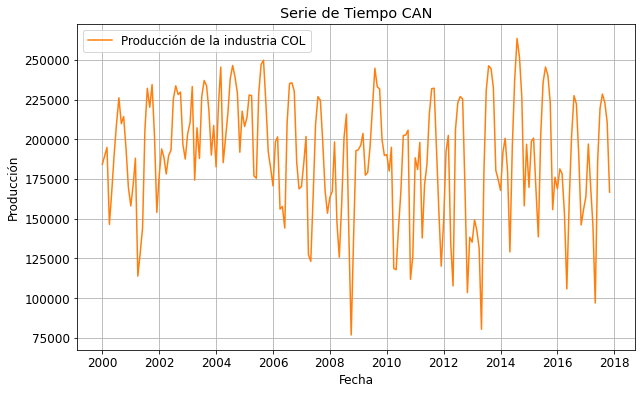

In [9]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(CANts, color='tab:orange', label='Producción de la industria COL')
ax.set_xlabel('Fecha')
ax.set_ylabel('Producción')
ax.set_title('Serie de Tiempo CAN')
ax.grid(True)
ax.legend(loc='upper left');

#### Grafico de autocorrelación
El acf que se presenta a continuación nos muestra que los datos presentan una estructura de autocorrelación aunque no muy fuerte porque no todos los rezagos están correlacionados, además se observa que la serie no es estacionaria porque se presenta correlación.

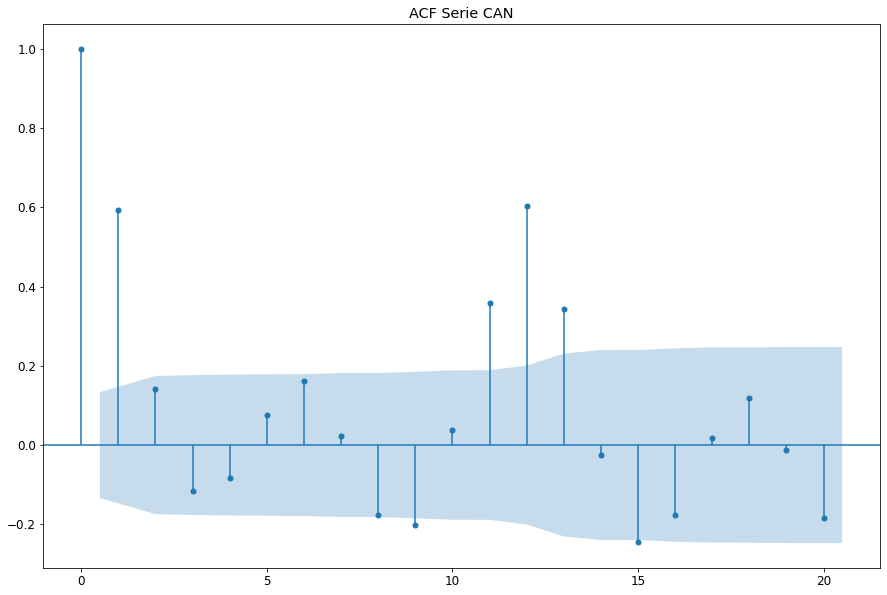

In [10]:
a=plot_acf(CANts,adjusted=False,lags=20,title='ACF Serie CAN')

## Punto 2
La serie de tiempo requiere de una transformaci´on del tipo Box-Cox? De
sugerir el uso de transformaci´on, use el valor de λ que nos arroja Python.
Explique(2 puntos)

In [18]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
data = df
print(sp.stats.boxcox(data['CAN'],alpha=0.05))

(array([7.25833335e+09, 7.67823319e+09, 8.08816709e+09, 4.66226289e+09,
       5.99541621e+09, 7.73991910e+09, 9.29575894e+09, 1.07739087e+10,
       9.32984471e+09, 9.71227200e+09, 8.00590805e+09, 6.19177257e+09,
       5.40143797e+09, 6.34318514e+09, 7.55163262e+09, 2.87223281e+09,
       3.60487087e+09, 4.52451508e+09, 8.98804278e+09, 1.13295457e+10,
       1.02319868e+10, 1.15476067e+10, 8.68633676e+09, 5.13795613e+09,
       6.75771618e+09, 8.01132203e+09, 7.62064884e+09, 6.80386640e+09,
       7.67422309e+09, 7.95043968e+09, 1.06927384e+10, 1.14770799e+10,
       1.09596520e+10, 1.11080354e+10, 8.22859918e+09, 7.51454092e+09,
       8.79116671e+09, 9.38112374e+09, 1.14318196e+10, 6.52139824e+09,
       9.10259802e+09, 7.54134656e+09, 1.08560301e+10, 1.17948511e+10,
       1.14747925e+10, 1.00440183e+10, 7.70733212e+09, 9.22542727e+09,
       7.14013547e+09, 1.04389159e+10, 1.26187739e+10, 7.34065272e+09,
       8.53274145e+09, 9.92560127e+09, 1.19210424e+10, 1.27203004e+10,
     

EL valor que sugiere python es más grande que 1, por lo tanto no es necesario hacerle una transformación tipo BoxCox a los datos. Solo vamos a hacer la transformación y graficar la serie para ver si hay algun cambio importante

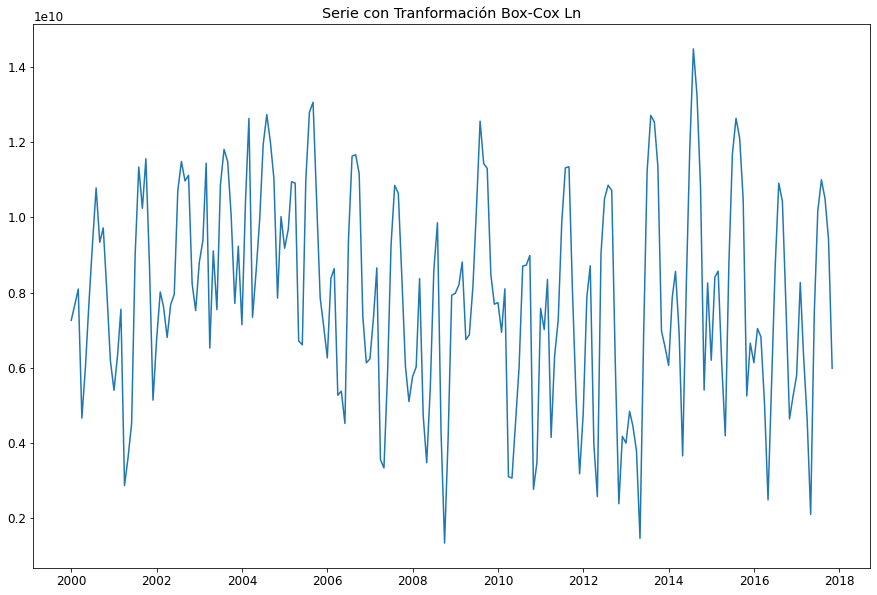

In [19]:
logCAN=sp.stats.boxcox(data['CAN'],lmbda=1.927)
data = data.assign(logCAN=logCAN)

logcocana=data.set_index(df['Período'])
logcanaco= logcocana['logCAN']
plt.plot(logcanaco)
plt.title('Serie con Tranformación Box-Cox Ln')
plt.show()

La serie es practicamente igual, no es necesaria la transformación.

## Punto 3
Con base en la acf muestral, proponga el n´umero de retardos de la variable
producci´on de ca˜na de az´ucar que deber´ıa tener en cuenta como covariables
(recuerde que s´olo debe tener en cuenta las primeras 20 autocorrelaciones
muestrales) para el ajuste de un modelo de arboles de decisi´on o de redes
neuronales. Explique.(2 puntos)


**Solución**

Para recordar el acf grafiquemoslo de nuevo

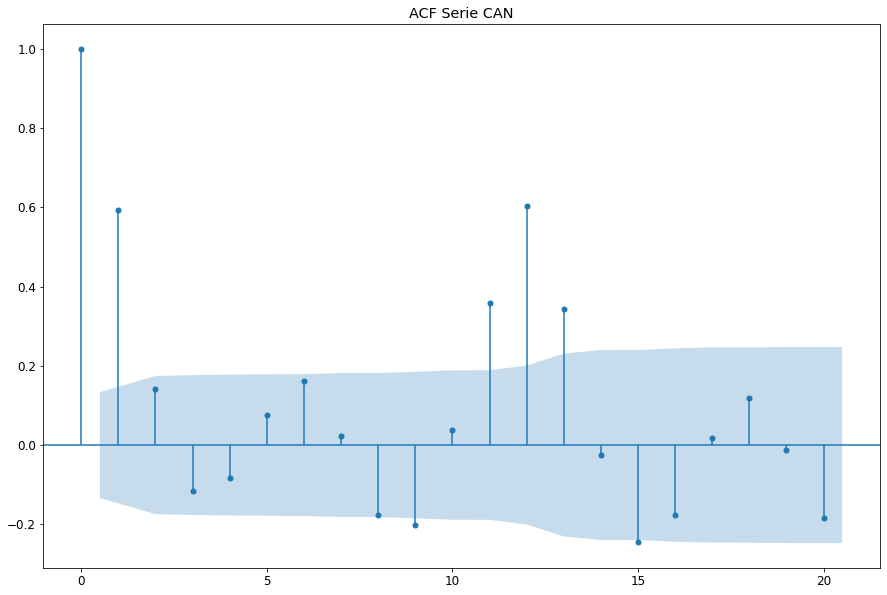

In [20]:
a=plot_acf(CANts,adjusted=False,lags=20,title='ACF Serie CAN')

Teniendo en cuenta unicamente los primeros 20 retardos, podriamos pensar en los primeros 13 retardos (casi un año) ya que hasta ese punto son lo más significativos. Se puede observar que hay algunos retardos cuya correlación es casi cero pero esto no es problema porque en la poda del arbol eso se corrige. Veamos la dispersión entre estos los 8 primeros retardos.

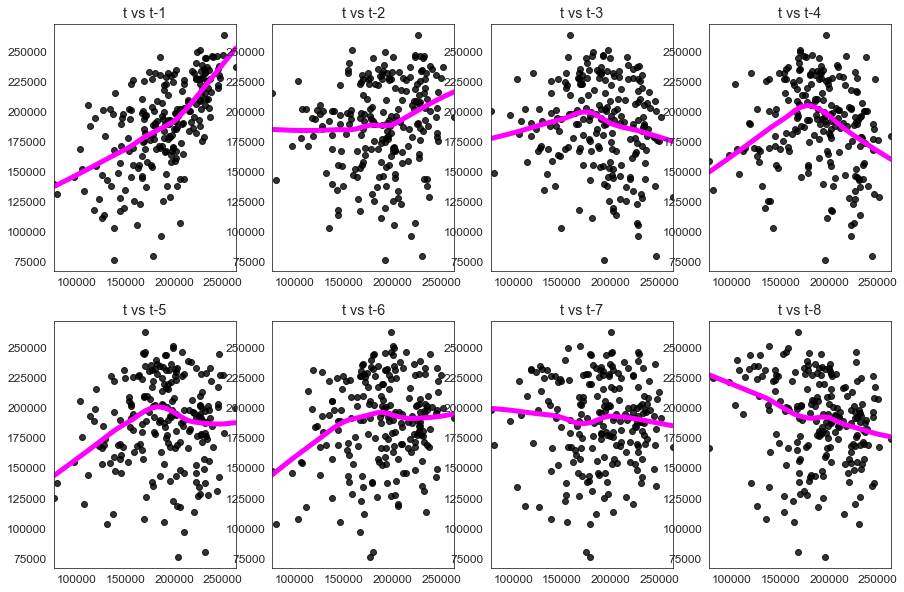

In [24]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(CANts.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black",lowess=True,
    line_kws={"color":"magenta", "linewidth":5})
plt.show()

Como dijimos en algunos no se ve relación estadística, pero en la mayoria sí. Luego escogemos los primeros 13

## Punto 4
Ajuste 3 modelos para la serie de tiempo indicada (1 de Suavizamiento
exponencial, 1 de arboles de decisi´on y 1 de Redes neuronales multicapa.)


### Suavizamiento Exponencial
Lo ajustamos de la siguiente manera, recuerde que no se debia hacer transformación de BoxCox entonces se trabaja con la serie original:

C:\Users\sanch\anaconda3\envs\d2l\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanch\anaconda3\envs\d2l\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sanch\anaconda3\envs\d2l\lib\site-packages\statsmodels\tsa\holtwinters\results.py:169: FutureWarning: slope is deprecated and will be removed after 0.13
  warnings.warn(


Text(0, 0.5, 'resid')

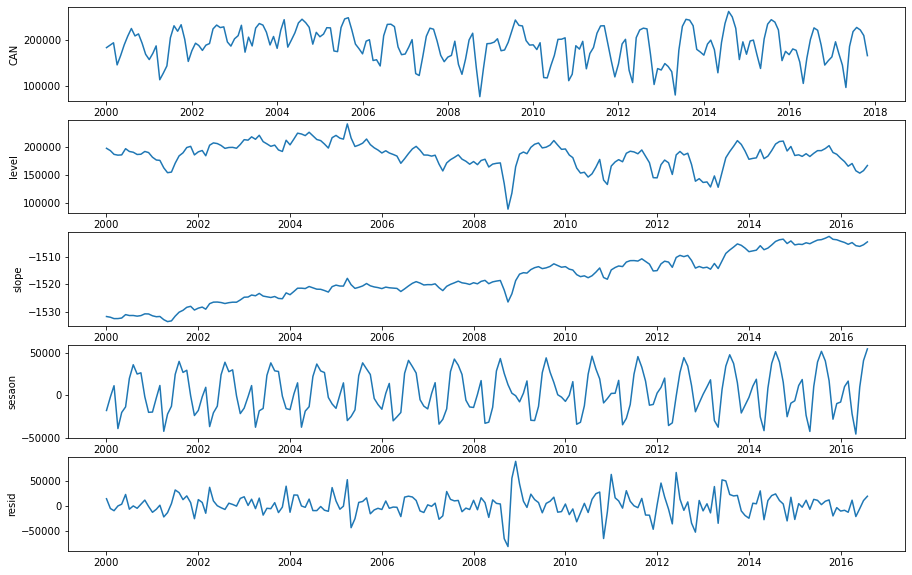

In [84]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #suavizamiento exponencial
#print(pd.infer_freq(data['Month'], warn=True))

trainCAN = CANts[0:200] # USAR EL TAMAÑO PARA VALIDAR DESPUES
fit1 = ExponentialSmoothing(trainCAN, seasonal_periods=12, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()
#metemos la serie, hacemos explicita la frecuencia de cada cuanto observa

####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(CANts)
plt.ylabel('CAN')
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope')
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [85]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.535357,True
smoothing_trend,beta,0.000100,True
smoothing_seasonal,gamma,0.146729,True
initial_level,l.0,190895.328862,True
initial_trend,b.0,-1532.476237,True
initial_seasons.0,s.0,-19843.211767,True
initial_seasons.1,s.1,-1131.754663,True
initial_seasons.2,s.2,12613.253299,True
initial_seasons.3,s.3,-38850.554462,True
initial_seasons.4,s.4,-20556.702994,True


El pronostico para 15 periodos adelante es:

<AxesSubplot:xlabel='Período'>

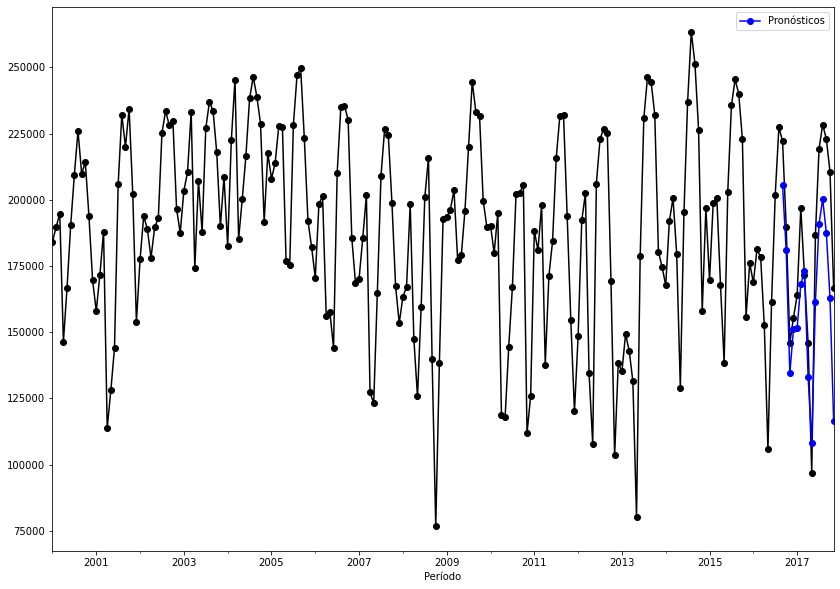

In [86]:
fcast1 = fit1.forecast(15).rename("Pronósticos")
ax = CANts.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

In [131]:
from datetime import datetime
fcast2 = fit1.predict(datetime(2000, 1,1))

### Arboles de decisión
**Solución**

Vamos a trabajar con la serie original ya que la tendencia no es muy marcada, sin embargo, en caso de no dar buenos resultados o como mejoramiento del modelo podemos refinarnos y trabajar con la serie sin tendencia o diferenciada. Veremos que sucede durante del desarrollo.

#### Preparamos las covariables

In [5]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [6]:
CANdf = pd.DataFrame(CANts.values,index=CANts.index)
type(CANdf)
print(CANdf)

                        0
Período                  
2000-01-01  184191.964777
2000-02-01  189647.055084
2000-03-01  194835.875584
2000-04-01  146387.707672
2000-05-01  166796.678167
...                   ...
2017-07-01  219326.605770
2017-08-01  228424.443380
2017-09-01  222938.691960
2017-10-01  210691.487200
2017-11-01  166674.512950

[215 rows x 1 columns]


In [7]:
## tenemos los rezagos de las 13 primeras, segun lo que salio en el acf
for i in range(13,0,-1):
    df1[['t-'+str(i)]] = CANdf.shift(i)
    
print(df1)

                    t-13          t-12          t-11          t-10  \
Período                                                              
2000-01-01           NaN           NaN           NaN           NaN   
2000-02-01           NaN           NaN           NaN           NaN   
2000-03-01           NaN           NaN           NaN           NaN   
2000-04-01           NaN           NaN           NaN           NaN   
2000-05-01           NaN           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2017-07-01  161563.73863  201941.10707  227459.49747  222197.58719   
2017-08-01  201941.10707  227459.49747  222197.58719  189816.81895   
2017-09-01  227459.49747  222197.58719  189816.81895  146007.66898   
2017-10-01  222197.58719  189816.81895  146007.66898  155506.33485   
2017-11-01  189816.81895  146007.66898  155506.33485  163933.72139   

                     t-9           t-8           t-7           t-6  \
Período            

In [8]:
# Agregamos t
df1['t'] = CANdf.values
print(df1.head(13))

            t-13           t-12           t-11           t-10            t-9  \
Período                                                                        
2000-01-01   NaN            NaN            NaN            NaN            NaN   
2000-02-01   NaN            NaN            NaN            NaN            NaN   
2000-03-01   NaN            NaN            NaN            NaN            NaN   
2000-04-01   NaN            NaN            NaN            NaN            NaN   
2000-05-01   NaN            NaN            NaN            NaN            NaN   
2000-06-01   NaN            NaN            NaN            NaN            NaN   
2000-07-01   NaN            NaN            NaN            NaN            NaN   
2000-08-01   NaN            NaN            NaN            NaN            NaN   
2000-09-01   NaN            NaN            NaN            NaN            NaN   
2000-10-01   NaN            NaN            NaN            NaN  184191.964777   
2000-11-01   NaN            NaN         

In [9]:
# Create a new subsetted dataframe, removing Nans from first 370 rows
df1_CAN = df1[13:]
print(df1_CAN)
df1_CAN.size

                     t-13           t-12           t-11           t-10  \
Período                                                                  
2001-02-01  184191.964777  189647.055084  194835.875584  146387.707672   
2001-03-01  189647.055084  194835.875584  146387.707672  166796.678167   
2001-04-01  194835.875584  146387.707672  166796.678167  190436.229310   
2001-05-01  146387.707672  166796.678167  190436.229310  209426.913207   
2001-06-01  166796.678167  190436.229310  209426.913207  226095.647435   
...                   ...            ...            ...            ...   
2017-07-01  161563.738630  201941.107070  227459.497470  222197.587190   
2017-08-01  201941.107070  227459.497470  222197.587190  189816.818950   
2017-09-01  227459.497470  222197.587190  189816.818950  146007.668980   
2017-10-01  222197.587190  189816.818950  146007.668980  155506.334850   
2017-11-01  189816.818950  146007.668980  155506.334850  163933.721390   

                      t-9            

2828

#### Dividir los datos de entrenamiento y validación

In [68]:
CANsplit = df1_CAN.values
# split into lagged variables and original time series
X1= CANsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =CANsplit[:,-1] # slice all rows and last column, essentially separating out 't' column

print(X1)
print(y1)

[[184191.96477673 189647.05508442 194835.87558442 ... 193804.99665853
  169609.69202883 158005.82      ]
 [189647.05508442 194835.87558442 146387.7076716  ... 169609.69202883
  158005.82       171749.649     ]
 [194835.87558442 146387.7076716  166796.67816711 ... 158005.82
  171749.649      188017.7883    ]
 ...
 [227459.49747    222197.58719    189816.81895    ... 186665.47934
  219326.60577    228424.44338   ]
 [222197.58719    189816.81895    146007.66898    ... 219326.60577
  228424.44338    222938.69196   ]
 [189816.81895    146007.66898    155506.33485    ... 228424.44338
  222938.69196    210691.4872    ]]
[171749.649    188017.7883   113848.175    128095.08626  144126.96007
 205799.99287  232073.74099  220120.48121  234381.20007  202185.44445
 153957.788625 177485.7776   193873.0015   188907.5969   178113.78485
 189595.64679  193106.98269  225210.03416  233637.21666  228110.21363
 229707.80152  196584.19971  187537.95801  203448.09279  210422.798455
 233158.60938  174237.14555 

In [69]:
from pandas import read_csv
Y1 = y1
traintarget_size = int(len(Y1) * 0.93023) # Set split, este porcentaje tan raro es para que coincida con el 15.
#TAREA BUSCAR SI SE PUEDE AJUSTAR POR CUANTOS DIAS UNO QUIERE
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 202
Training Observations for Target: 187
Testing Observations for Target: 15


No se puede 200 de entrenamiento y 15 de validación porque eliminamos los 13 NAs

In [70]:
# Features Train-Test split
trainfeature_size = int(len(X1) * 0.93023)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 202
Training Observations for feature: 187
Testing Observations for feature: 15


#### El modelo

In [71]:
#Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with default arguments
decision_tree_ISE = DecisionTreeRegressor() # max-depth not set
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_ISE.fit(train_feature, train_target)
# Check the score on train and test
print(decision_tree_ISE.score(train_feature, train_target))
print(decision_tree_ISE.score(test_feature,test_target)) # predictions are␣horrible if negative value, no relationship if 0

1.0
0.6952343664481488


El resultado no es malo pero vamos a hacer la poda con los valores sugeridos

In [72]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_PM25 = DecisionTreeRegressor(max_depth=d)
    decision_tree_PM25.fit(train_feature, train_target)
    # Print out the scores on train and test, deberiamos añadir el conjunto de validación cuando tengamos más modelos
    print('max_depth=', str(d))
    print(decision_tree_PM25.score(train_feature, train_target))
    print(decision_tree_PM25.score(test_feature, test_target), '\n')

max_depth= 2
0.5131429701855343
0.2619236489461766 

max_depth= 3
0.608015698084353
0.6019008344457377 

max_depth= 4
0.7271820265050244
0.6759573645379824 

max_depth= 5
0.8460480243454969
0.6718646436212675 

max_depth= 7
0.9429287899156666
0.4581829935365773 

max_depth= 8
0.9671066871273141
0.5900429767809549 

max_depth= 10
0.9939105715638774
0.6581492454743935 



El score más grande es para la profundidad igual a 5, entonces escogemos esta

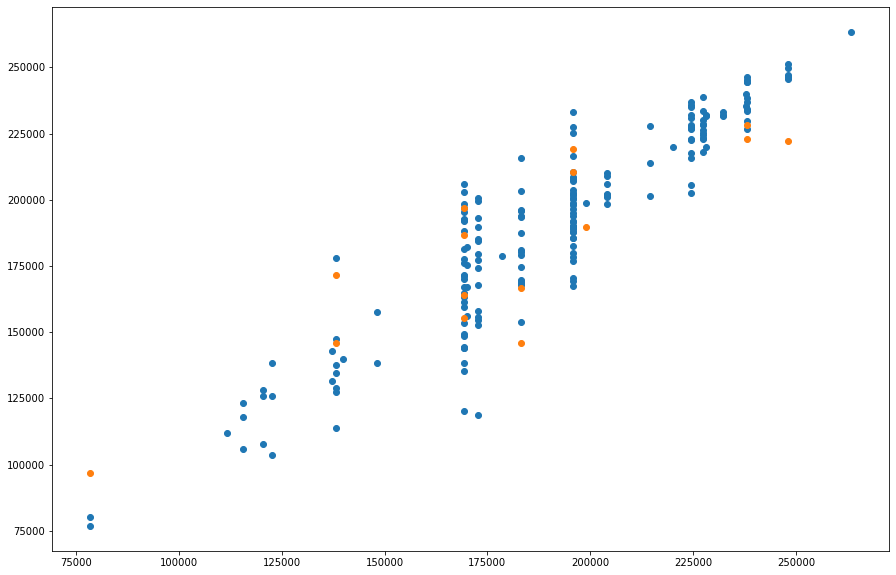

In [73]:
# Plot predicted against actual values
from matplotlib import pyplot as plt
# Use the best max_depth
decision_tree_ISE = DecisionTreeRegressor(max_depth=5) # fill in best max depth here
decision_tree_ISE.fit(train_feature, train_target)
# Predict values for train and test
train_prediction = decision_tree_ISE.predict(train_feature)
test_prediction = decision_tree_ISE.predict(test_feature)
# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train') # blue
plt.scatter(test_prediction, test_target, label='test') # orange
plt.show()

In [74]:
from sklearn import tree
listacaract=list(df1_CAN.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_ISE)
print(text_representation)

|--- feature_1 <= 208297.34
|   |--- feature_12 <= 169560.66
|   |   |--- feature_9 <= 165286.94
|   |   |   |--- feature_10 <= 146126.35
|   |   |   |   |--- feature_5 <= 196167.80
|   |   |   |   |   |--- value: [178655.57]
|   |   |   |   |--- feature_5 >  196167.80
|   |   |   |   |   |--- value: [137177.95]
|   |   |   |--- feature_10 >  146126.35
|   |   |   |   |--- feature_7 <= 151006.60
|   |   |   |   |   |--- value: [78566.81]
|   |   |   |   |--- feature_7 >  151006.60
|   |   |   |   |   |--- value: [120489.75]
|   |   |--- feature_9 >  165286.94
|   |   |   |--- feature_5 <= 232610.03
|   |   |   |   |--- feature_0 <= 191887.03
|   |   |   |   |   |--- value: [169210.88]
|   |   |   |   |--- feature_0 >  191887.03
|   |   |   |   |   |--- value: [122643.70]
|   |   |   |--- feature_5 >  232610.03
|   |   |   |   |--- feature_4 <= 246270.60
|   |   |   |   |   |--- value: [115569.57]
|   |   |   |   |--- feature_4 >  246270.60
|   |   |   |   |   |--- value: [148086.96]
| 

Obtenemos una representación del arbol

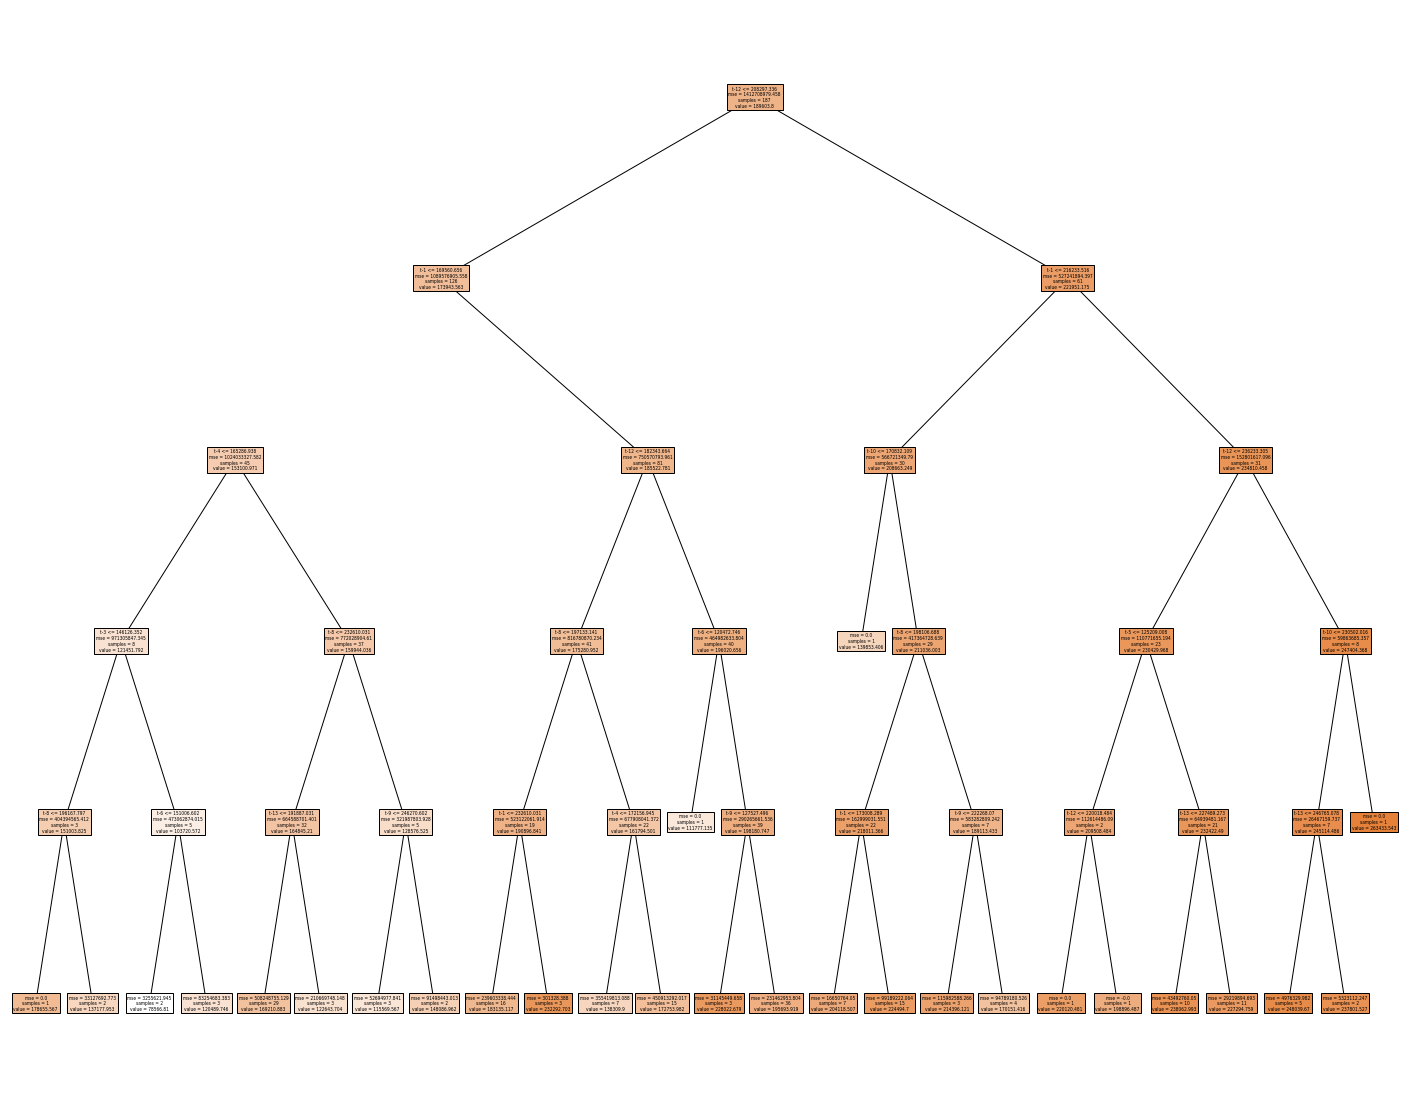

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_ISE,
feature_names=listacaract,
class_names=respuesta,
filled=True)

Comparamos los tamaños para cerificar que todo OK

In [76]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

indicetrian_test=df1_CAN.index
print(indicetrian_test.size) ###Tamaño del índice


187
187
15
15
202


In [77]:
indicetrain=indicetrian_test[0:186]
indicetest=indicetrian_test[186:201]

print(indicetrain.size)
print(indicetest.size)

targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

186
15
202
202


In [78]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
Período,,
2001-02-01,171749.64900,169210.883137
2001-03-01,188017.78830,195693.918871
2001-04-01,113848.17500,138309.899921
2001-05-01,128095.08626,120489.746455
2001-06-01,144126.96007,169210.883137
2001-07-01,205799.99287,204118.506935
2001-08-01,232073.74099,224494.699935
2001-09-01,220120.48121,220120.481210
2001-10-01,234381.20007,238062.993487


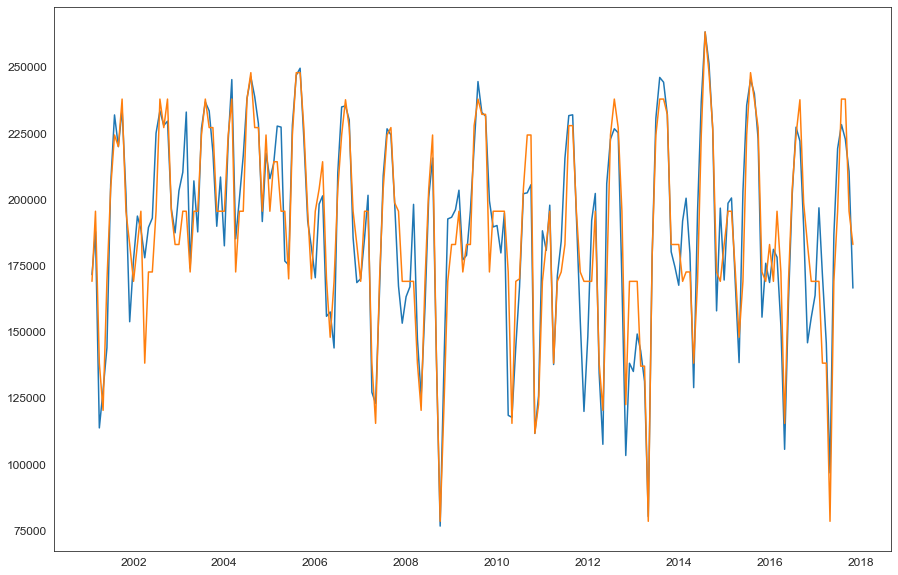

In [54]:
plt.plot(ObsvsPred)

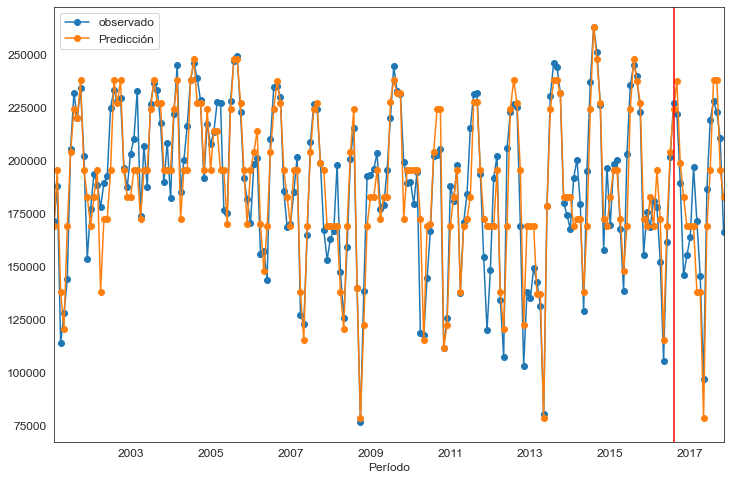

In [55]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[186].date(),color='red')

### Redes Neuronales 
Usamos las mismas covariables

In [10]:
print(df1_CAN.head(7))
df1_CAN.shape

                     t-13           t-12           t-11           t-10  \
Período                                                                  
2001-02-01  184191.964777  189647.055084  194835.875584  146387.707672   
2001-03-01  189647.055084  194835.875584  146387.707672  166796.678167   
2001-04-01  194835.875584  146387.707672  166796.678167  190436.229310   
2001-05-01  146387.707672  166796.678167  190436.229310  209426.913207   
2001-06-01  166796.678167  190436.229310  209426.913207  226095.647435   
2001-07-01  190436.229310  209426.913207  226095.647435  209825.091079   
2001-08-01  209426.913207  226095.647435  209825.091079  214245.405293   

                      t-9            t-8            t-7            t-6  \
Período                                                                  
2001-02-01  166796.678167  190436.229310  209426.913207  226095.647435   
2001-03-01  190436.229310  209426.913207  226095.647435  209825.091079   
2001-04-01  209426.913207  226095.647

(202, 14)

#### Dividimos la data en validacion y entrenamiento

In [11]:
# Split data
PRESsplit = df1_CAN.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]

In [12]:
print(X1)
print(y1)

[[184191.96477673 189647.05508442 194835.87558442 ... 193804.99665853
  169609.69202883 158005.82      ]
 [189647.05508442 194835.87558442 146387.7076716  ... 169609.69202883
  158005.82       171749.649     ]
 [194835.87558442 146387.7076716  166796.67816711 ... 158005.82
  171749.649      188017.7883    ]
 ...
 [227459.49747    222197.58719    189816.81895    ... 186665.47934
  219326.60577    228424.44338   ]
 [222197.58719    189816.81895    146007.66898    ... 219326.60577
  228424.44338    222938.69196   ]
 [189816.81895    146007.66898    155506.33485    ... 228424.44338
  222938.69196    210691.4872    ]]
[171749.649    188017.7883   113848.175    128095.08626  144126.96007
 205799.99287  232073.74099  220120.48121  234381.20007  202185.44445
 153957.788625 177485.7776   193873.0015   188907.5969   178113.78485
 189595.64679  193106.98269  225210.03416  233637.21666  228110.21363
 229707.80152  196584.19971  187537.95801  203448.09279  210422.798455
 233158.60938  174237.14555 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_val, y_train, y_val=train_test_split(X1,y1,test_size=0.06977, train_size=0.93023, shuffle=False)

print(X_train.shape) #80% DEL 90%
print(X_val.shape) #20 DEL 90%
print(y_train.shape)
print(y_val.shape)

(187, 13)
(15, 13)
(187,)
(15,)


Normalizamos las covariables

In [14]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_train

array([[0.57550155, 0.60472456, 0.63252116, ..., 0.62699872, 0.49738408,
        0.43522194],
       [0.60472456, 0.63252116, 0.37298352, ..., 0.49738408, 0.43522194,
        0.50884786],
       [0.63252116, 0.37298352, 0.48231471, ..., 0.43522194, 0.50884786,
        0.59599655],
       ...,
       [0.33084401, 0.67698695, 0.85127497, ..., 0.54414791, 0.40592303,
        0.15535739],
       [0.67698695, 0.85127497, 0.90370068, ..., 0.40592303, 0.15535739,
        0.45428177],
       [0.85127497, 0.90370068, 0.8750485 , ..., 0.15535739, 0.45428177,
        0.670584  ]])

In [58]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="tanh")(input_layer)
hidden2 = keras.layers.Dense(32,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(32, activation="tanh")(hidden2) # verificar que no produzca nans
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [59]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


In [60]:
ts_model.compile(loss="mean_squared_error",optimizer="sgd")
history=ts_model.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
6/6 [==============================] - 1s 58ms/step - loss: 23109565586.2857 - val_loss: 1447907072.0000
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 1362233636.5714 - val_loss: 1279420288.0000
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1432382043.4286 - val_loss: 1291470976.0000
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1331178496.0000 - val_loss: 1285467776.0000
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 1450139428.5714 - val_loss: 1386119168.0000
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1395559936.0000 - val_loss: 1313523072.0000
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 1347147940.5714 - val_loss: 1283128576.0000
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 1334549138.2857 - val_loss: 1434994304.0000
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 153842

<AxesSubplot:>

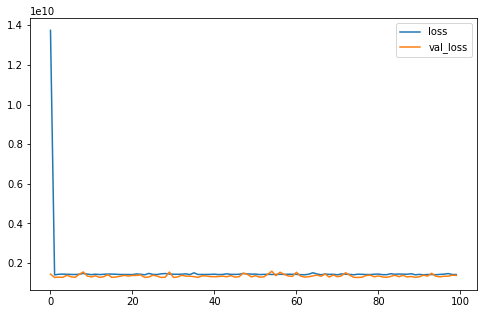

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [63]:
mse_test=ts_model.evaluate(X_val,y_val)
print(mse_test)

1/1 [==============================] - 0s 13ms/step - loss: 1380732800.0000
1380732800.0


In [137]:
ypred=ts_model.predict(X_val)
print(ypred)

[[191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]
 [191649.45]]
          Column1
0   191649.453125
1   191649.453125
2   191649.453125
3   191649.453125
4   191649.453125
5   191649.453125
6   191649.453125
7   191649.453125
8   191649.453125
9   191649.453125
10  191649.453125
11  191649.453125
12  191649.453125
13  191649.453125
14  191649.453125


Text(0.5, 0, 'Index')

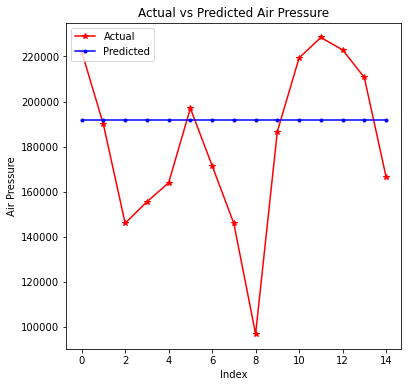

In [66]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_val.size), y_val, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

## Punto 5

Obtenga el error cuadr´atico medio de predicci´on basado en los modelos
ajustados del punto anterior y el conjunto de validaci´on. Cu´al modelo
1
escoger´ıa basado en ´este criterio ´unicamente?Tenga en cuenta que debe
reportar el error cuadr´atico medio en la escala original de los datos.(2
puntos)

El error cuadratico medio para las redes neuronales es

In [67]:
print(mse_test)

1380732800.0


Para arboles de decisión es

In [80]:
import statistics as stats
stats.mean((ObsvsPred["observado"] - ObsvsPred["Predicción"])**2)

232505790.4321833

In [87]:
stats.mean((CANts[200:215] - fcast1)**2)

670643744.4556193

El menor de los errores cuadraticos es el de redes neuronales, por lo tanto este modelo se elige

## Punto 6
Obtenga los residuales del modelo ˆet = yt − yˆt, y haga un chequeo de su
gr´afica, y de la funci´on de autocorrelaci´on de los residuales. Qu´e puede
usted decir al respecto para cada modelo?(2 puntos)

### Para arboles

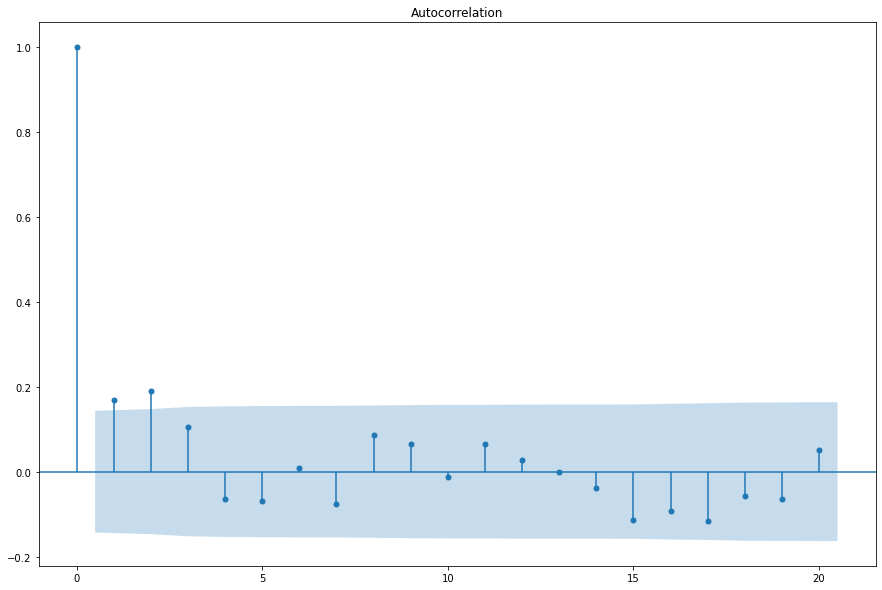

In [108]:
residuals = train_target - train_prediction
acfres=plot_acf(residuals, adjusted=False, lags=20)

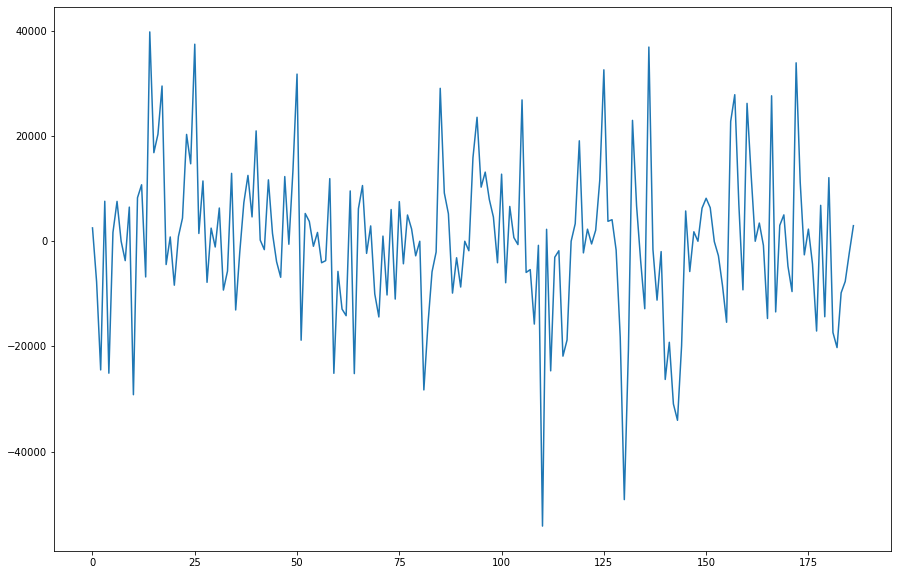

In [109]:
plt.plot(residuals)

### Para suavuzamiento

In [132]:
esua = CANts[0:200] - fcast2

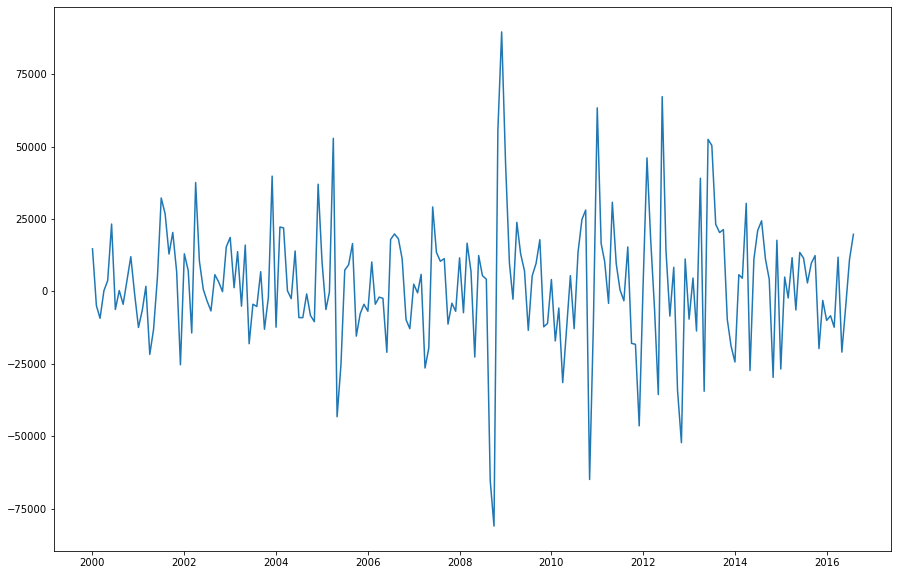

In [133]:
plt.plot(esua)

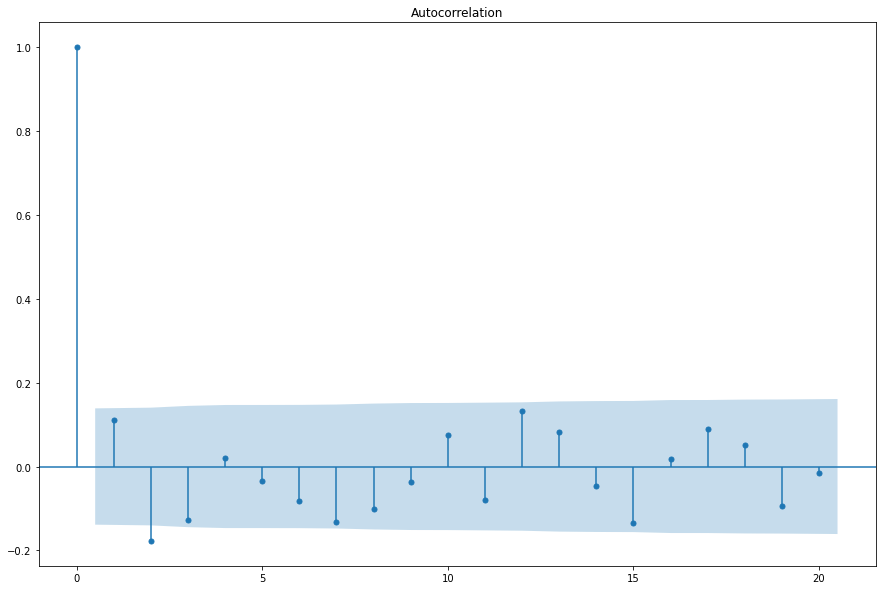

In [135]:
acfres=plot_acf(esua, adjusted=False, lags=20) #poner los lags correctos o salta error

### Para redes

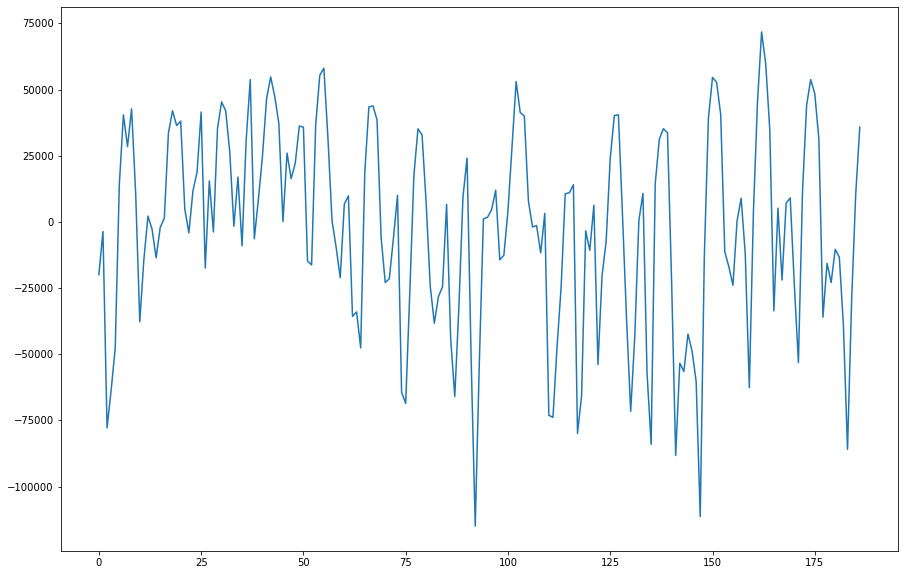

In [140]:
xpred = ts_model.predict(X_train)
datasetpred = pd.DataFrame({'Column1': xpred[:, 0]}) #ESTO PARA TRATAR EL ARREGLO N-DIMENSIONAL
ered = y_train - datasetpred['Column1']
plt.plot(ered)

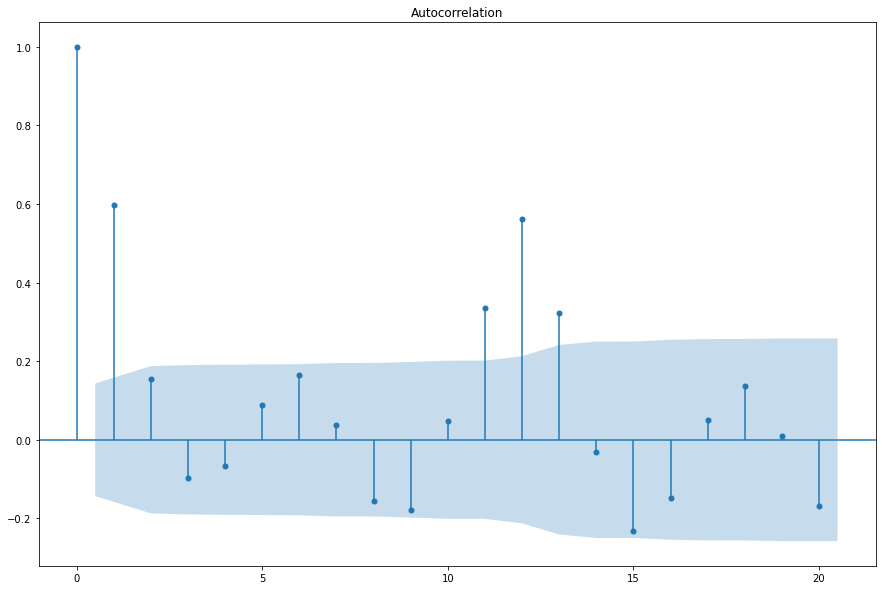

In [141]:
acfres=plot_acf(ered, adjusted=False, lags=20)